In [20]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [21]:
# 去掉警告
import warnings
warnings.filterwarnings("ignore")

In [22]:
# 导入数据
movies = pd.read_csv("tmdb.csv")
movies.head()  # 只显示前5条数据

,Unnamed: 0,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue
0,0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,12/22/2021 (US),68.0,"['Science Fiction', 'Action', 'Adventure']",624860,English,"$190,000,000.00","$156,497,322.00"
1,1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,12/17/2021 (US),58.0,"['Science Fiction', 'Thriller']",739413,English,-,-
2,2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,12/22/2021 (US),70.0,"['Action', 'Adventure', 'Thriller', 'War']",476669,English,"$100,000,000.00","$125,928,656.00"
3,3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,01/01/2022 (US),79.0,['Documentary'],899082,English,-,-
4,4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,01/07/2022 (US),60.0,"['Action', 'Thriller']",522016,English,"$75,000,000.00","$24,000,000.00"


In [23]:
# 产看有哪些特征值
movies.columns

Index(['Unnamed: 0', 'title', 'page', 'url', 'publish_time', 'rating',
       'genres', 'movie_id', 'language', 'budget', 'revenue'],
      dtype='object')

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15574 entries, 0 to 15573
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    15574 non-null  int64  
 1   title         14691 non-null  object 
 2   page          15574 non-null  int64  
 3   url           15574 non-null  object 
 4   publish_time  14691 non-null  object 
 5   rating        14691 non-null  float64
 6   genres        15574 non-null  object 
 7   movie_id      15574 non-null  int64  
 8   language      15574 non-null  object 
 9   budget        15574 non-null  object 
 10  revenue       15574 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [25]:
# 删除第一列数据
del movies['Unnamed: 0']
movies

,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue
0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,12/22/2021 (US),68.0,"['Science Fiction', 'Action', 'Adventure']",624860,English,"$190,000,000.00","$156,497,322.00"
1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,12/17/2021 (US),58.0,"['Science Fiction', 'Thriller']",739413,English,-,-
2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,12/22/2021 (US),70.0,"['Action', 'Adventure', 'Thriller', 'War']",476669,English,"$100,000,000.00","$125,928,656.00"
3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,01/01/2022 (US),79.0,['Documentary'],899082,English,-,-
4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,01/07/2022 (US),60.0,"['Action', 'Thriller']",522016,English,"$75,000,000.00","$24,000,000.00"
...,...,...,...,...,...,...,...,...,...,...
15569,In a Lonely Place,379,https://www.themoviedb.org/movie/17057-in-a-lo...,05/17/1950 (US),76.0,"['Thriller', 'Mystery', 'Drama', 'Romance']",17057,English,-,-
15570,Sunset Boulevard,379,https://www.themoviedb.org/movie/599-sunset-bo...,08/10/1950 (US),84.0,['Drama'],599,English,"$1,752,000.00","$5,000,000.00"
15571,Rashomon,379,https://www.themoviedb.org/movie/548-rash-mon,12/26/1950 (US),82.0,"['Crime', 'Drama', 'Mystery']",548,Japanese,"$250,000.00","$96,568.00"
15572,All About Eve,379,https://www.themoviedb.org/movie/705-all-about...,11/09/1950 (US),82.0,['Drama'],705,English,"$1,400,000.00","$8,400,000.00"


In [26]:
# 处理日期时间对象
# 把日期对象后面的字符部分去掉
movies.publish_time = movies.publish_time.str.replace("\(\w+\)","")
# 转换成日期时间对象
movies.publish_time = pd.to_datetime(movies.publish_time)
movies

,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue
0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,2021-12-22,68.0,"['Science Fiction', 'Action', 'Adventure']",624860,English,"$190,000,000.00","$156,497,322.00"
1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,2021-12-17,58.0,"['Science Fiction', 'Thriller']",739413,English,-,-
2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,2021-12-22,70.0,"['Action', 'Adventure', 'Thriller', 'War']",476669,English,"$100,000,000.00","$125,928,656.00"
3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,2022-01-01,79.0,['Documentary'],899082,English,-,-
4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,2022-01-07,60.0,"['Action', 'Thriller']",522016,English,"$75,000,000.00","$24,000,000.00"
...,...,...,...,...,...,...,...,...,...,...
15569,In a Lonely Place,379,https://www.themoviedb.org/movie/17057-in-a-lo...,1950-05-17,76.0,"['Thriller', 'Mystery', 'Drama', 'Romance']",17057,English,-,-
15570,Sunset Boulevard,379,https://www.themoviedb.org/movie/599-sunset-bo...,1950-08-10,84.0,['Drama'],599,English,"$1,752,000.00","$5,000,000.00"
15571,Rashomon,379,https://www.themoviedb.org/movie/548-rash-mon,1950-12-26,82.0,"['Crime', 'Drama', 'Mystery']",548,Japanese,"$250,000.00","$96,568.00"
15572,All About Eve,379,https://www.themoviedb.org/movie/705-all-about...,1950-11-09,82.0,['Drama'],705,English,"$1,400,000.00","$8,400,000.00"


In [27]:
# 删除为空的行
movies.dropna(inplace=True)

In [28]:
# 获取所有电影类型
# 将genres列数据的【】和‘’去掉
movies.genres = movies.genres.str.replace("[\'\'\]\[]","")
col = list(set(", ".join(movies.genres).split(", ")))
col

['History',
 'Animation',
 'Adventure',
 'Western',
 'Thriller',
 'Documentary',
 'Science Fiction',
 'Mystery',
 'Family',
 'Fantasy',
 'Comedy',
 'Romance',
 'Drama',
 'Horror',
 'TV Movie',
 'Action',
 'Music',
 'Crime',
 'War']

In [29]:
# 生成一个新的df对象，列名味所有的电影类型，以便后期统计数据用
temp = pd.DataFrame(np.zeros((movies.shape[0],len(col))),columns=col,index=movies.index)
temp

,History,Animation,Adventure,Western,Thriller,Documentary,Science Fiction,Mystery,Family,Fantasy,Comedy,Romance,Drama,Horror,TV Movie,Action,Music,Crime,War
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# 将movies和temp拼接，横向
movies = pd.concat((movies,temp),axis=1)
movies.head()

,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue,...,Fantasy,Comedy,Romance,Drama,Horror,TV Movie,Action,Music,Crime,War
0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,2021-12-22,68.0,"Science Fiction, Action, Adventure",624860,English,"$190,000,000.00","$156,497,322.00",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,2021-12-17,58.0,"Science Fiction, Thriller",739413,English,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,2021-12-22,70.0,"Action, Adventure, Thriller, War",476669,English,"$100,000,000.00","$125,928,656.00",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,2022-01-01,79.0,Documentary,899082,English,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,2022-01-07,60.0,"Action, Thriller",522016,English,"$75,000,000.00","$24,000,000.00",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# 电影类型判断
for i in col:
    # 在当前类型列，如果类型i在当前电影类型中存在，则填充当前电影分数，否则置为NAN
    movies[i] = np.where(movies["genres"].str.contains(i),movies.rating,np.nan)
    # 把rating分成几个档，并把对应的rating归类在对应的区间
    movies[i+"档次"] = pd.cut(movies[i],bins=[0,60,80,101],right=False,labels=["6.0-","6.0-8.0","8.0+"])
movies.head()

,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue,...,Fantasy档次,Comedy档次,Romance档次,Drama档次,Horror档次,TV Movie档次,Action档次,Music档次,Crime档次,War档次
0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,2021-12-22,68.0,"Science Fiction, Action, Adventure",624860,English,"$190,000,000.00","$156,497,322.00",...,NaN,NaN,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,NaN
1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,2021-12-17,58.0,"Science Fiction, Thriller",739413,English,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,2021-12-22,70.0,"Action, Adventure, Thriller, War",476669,English,"$100,000,000.00","$125,928,656.00",...,NaN,NaN,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,6.0-8.0
3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,2022-01-01,79.0,Documentary,899082,English,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,2022-01-07,60.0,"Action, Thriller",522016,English,"$75,000,000.00","$24,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,NaN


In [32]:
# 年份分组
movies["year"] = pd.cut(movies.publish_time.dt.year,bins=[1900,2000,2010,2020,2023],right=False)
movies.head()

,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue,...,Comedy档次,Romance档次,Drama档次,Horror档次,TV Movie档次,Action档次,Music档次,Crime档次,War档次,year
0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,2021-12-22,68.0,"Science Fiction, Action, Adventure",624860,English,"$190,000,000.00","$156,497,322.00",...,NaN,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,NaN,"[2020, 2023)"
1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,2021-12-17,58.0,"Science Fiction, Thriller",739413,English,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020, 2023)"
2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,2021-12-22,70.0,"Action, Adventure, Thriller, War",476669,English,"$100,000,000.00","$125,928,656.00",...,NaN,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,6.0-8.0,"[2020, 2023)"
3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,2022-01-01,79.0,Documentary,899082,English,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020, 2023)"
4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,2022-01-07,60.0,"Action, Thriller",522016,English,"$75,000,000.00","$24,000,000.00",...,NaN,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,NaN,"[2020, 2023)"


In [33]:
# 按照年段进行分组，并统计出现的次数
temp_all = movies.groupby(["year",col[0]+"档次"])[col[0]].count()
temp_all = temp_all / temp_all.sum()
temp_all = temp_all.to_frame()

for i in col[1:]:
    temp = movies.groupby(["year",i+"档次"])[i].count()
    temp = temp / temp.sum()
    temp_all[i] = temp

temp_all = temp_all.T
temp_all

year            [1900, 2000)                     [2000, 2010)            \
History档次               6.0-   6.0-8.0      8.0+         6.0-   6.0-8.0   
History             0.000000  0.096257  0.026738     0.004011  0.175134   
Animation           0.003079  0.094688  0.006928     0.029253  0.204003   
Adventure           0.020515  0.122687  0.006436     0.076830  0.166533   
Western             0.005882  0.282353  0.023529     0.023529  0.158824   
Thriller            0.015016  0.096903  0.006335     0.059831  0.152511   
Documentary         0.000000  0.014218  0.014218     0.000000  0.180095   
Science Fiction     0.031944  0.109908  0.007580     0.072550  0.123985   
Mystery             0.006726  0.103139  0.011211     0.063528  0.179372   
Family              0.022497  0.110236  0.003937     0.078178  0.214848   
Fantasy             0.020552  0.104521  0.005872     0.065179  0.157369   
Comedy              0.017692  0.117008  0.005629     0.081825  0.167672   
Romance             0.006820  0.125746  0.008951     0.052856  0.210571   
Drama               0.004922  0.107967  0.018302     0.019994  0.183636   
Horror              0.026132  0.097527  0.002800     0.082128  0.105460   
TV Movie            0.000000  0.025157  0.000000     0.012579  0.169811   
Action              0.024404  0.102665  0.005049     0.067602  0.154558   
Music               0.009302  0.123256  0.011628     0.032558  0.195349   
Crime               0.012670  0.134679  0.014547     0.049273  0.187705   
War                 0.006993  0.149184  0.048951     0.020979  0.181818   

year                      [2010, 2020)                     [2020, 2023)  \
History档次            8.0+         6.0-   6.0-8.0      8.0+         6.0-   
History          0.005348     0.025401  0.536096  0.028075     0.000000   
Animation        0.003079     0.038491  0.425712  0.037721     0.000000   
Adventure        0.003620     0.079244  0.388174  0.018906     0.008045   
Western          0.000000     0.047059  0.329412  0.011765     0.000000   
Thriller         0.002346     0.166354  0.366729  0.004458     0.016424   
Documentary      0.018957     0.018957  0.502370  0.071090     0.000000   
Science Fiction  0.003249     0.119112  0.385490  0.011911     0.024364   
Mystery          0.002242     0.162930  0.336323  0.011211     0.011958   
Family           0.002812     0.055681  0.343082  0.025872     0.006749   
Fantasy          0.005285     0.088667  0.379918  0.014680     0.007046   
Comedy           0.000603     0.120225  0.368114  0.009650     0.005629   
Romance          0.003410     0.071185  0.387468  0.012788     0.005115   
Drama            0.006613     0.073823  0.453707  0.023531     0.007382   
Horror           0.000000     0.236118  0.291647  0.000467     0.024732   
TV Movie         0.012579     0.050314  0.540881  0.050314     0.025157   
Action           0.004208     0.127349  0.371388  0.010940     0.022440   
Music            0.000000     0.041860  0.381395  0.034884     0.000000   
Crime            0.007039     0.114969  0.363679  0.009385     0.009385   
War              0.006993     0.013986  0.438228  0.037296     0.009324   

year                                 
History档次         6.0-8.0      8.0+  
History          0.086898  0.016043  
Animation        0.116243  0.040801  
Adventure        0.092518  0.016492  
Western          0.117647  0.000000  
Thriller         0.110277  0.002816  
Documentary      0.123223  0.056872  
Science Fiction  0.095290  0.014618  
Mystery          0.111360  0.000000  
Family           0.114736  0.021372  
Fantasy          0.128009  0.022901  
Comedy           0.096301  0.009650  
Romance          0.098465  0.016624  
Drama            0.091510  0.008613  
Horror           0.132991  0.000000  
TV Movie         0.088050  0.025157  
Action           0.098177  0.011220  
Music            0.130233  0.039535  
Crime            0.089160  0.007508  
War              0.076923  0.009324

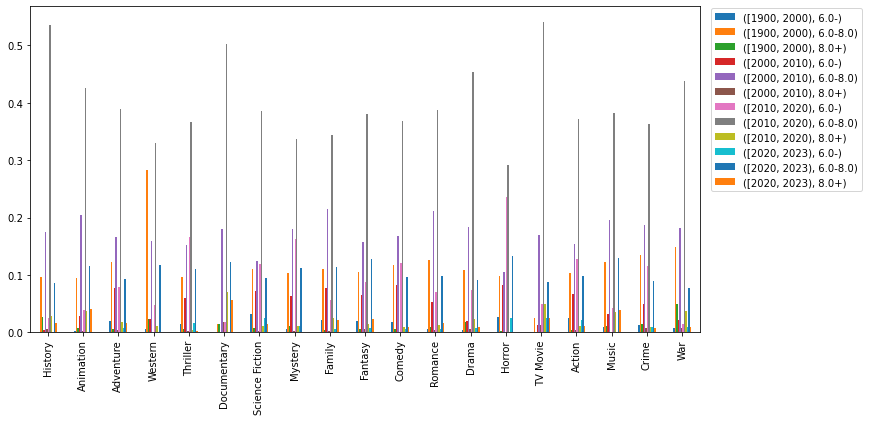

In [34]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax = temp_all.plot.bar(figsize=(12,6))
ax.legend(loc=1,bbox_to_anchor=(1.25,1.01))

In [35]:
# 各年段各语言占比
temp = movies.pivot_table(columns="language",index="year",values="title",aggfunc="count")
#temp = temp / temp.sum()
temp = temp.T
#temp
# 求某个年段的总电影数
print(temp[temp.columns[0]].sum())

1970


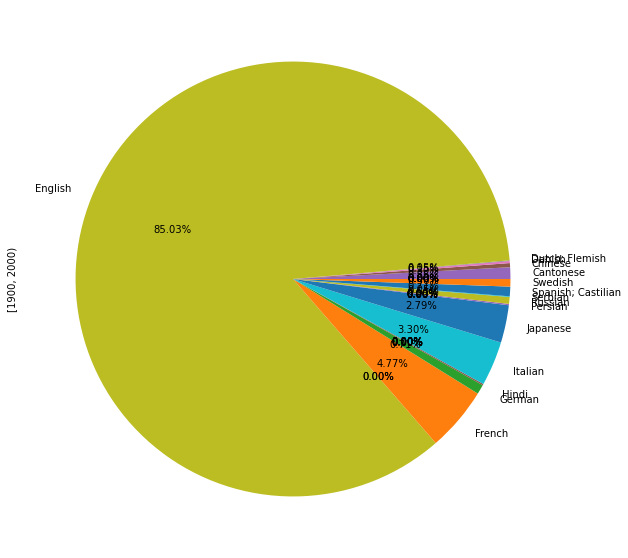

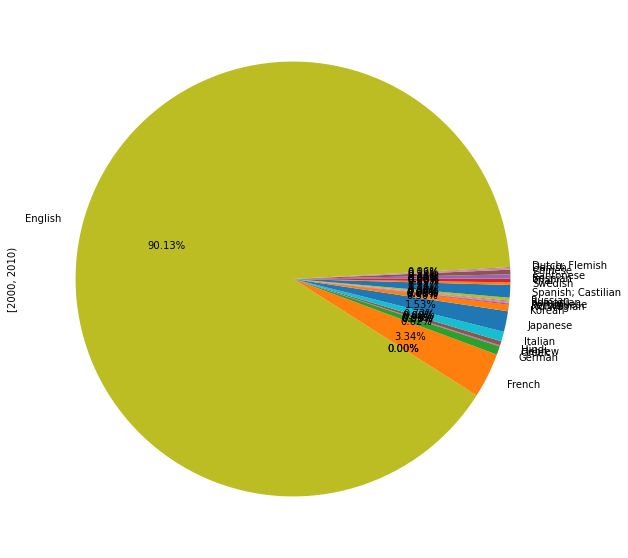

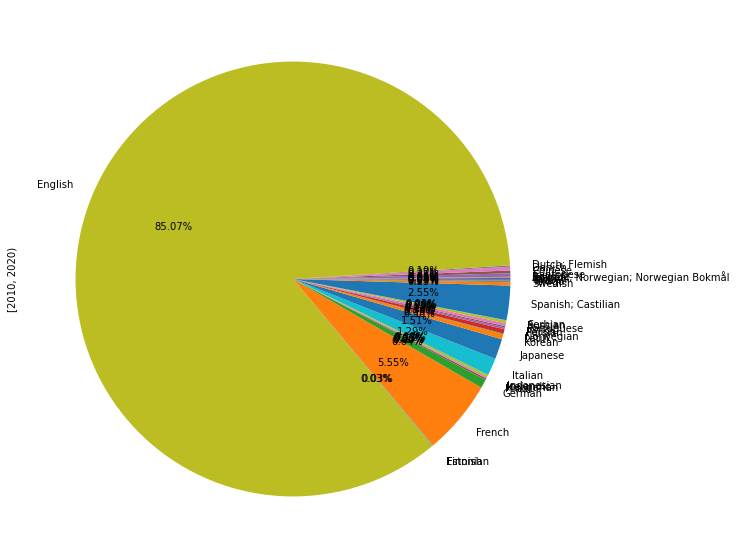

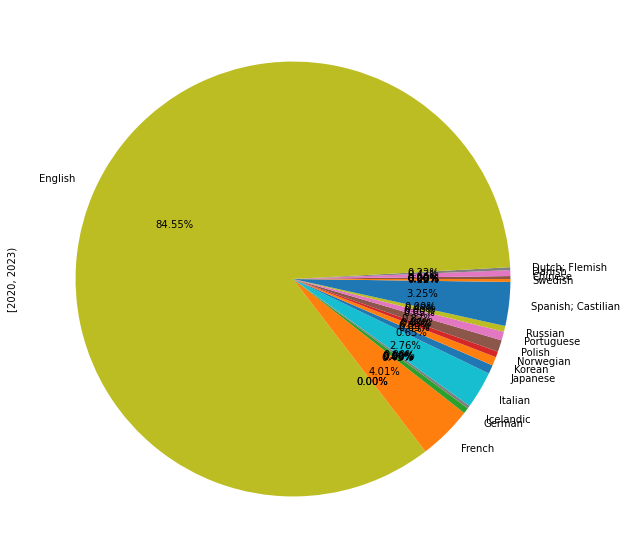

In [36]:
# [1900,2000)
ax = temp.iloc[:,0].plot.pie(figsize=(10,10),autopct="%.2f%%")
plt.show()
# [2001,2010)
ax = temp.iloc[:,1].plot.pie(figsize=(10,10),autopct="%.2f%%")
plt.show()

ax = temp.iloc[:,2].plot.pie(figsize=(10,10),autopct="%.2f%%")
plt.show()

ax = temp.iloc[:,3].plot.pie(figsize=(10,10),autopct="%.2f%%")
plt.show()

In [37]:
# 去掉$和，
movies.revenue = movies.revenue.str.replace("[$,]","")
movies.budget = movies.budget.str.replace("[$,]","")
# 处理缺失值
movies.revenue[movies.revenue=='-'] = np.nan
movies.budget[movies.budget=='-'] = np.nan
movies.revenue = movies.revenue.astype("float")
movies.budget = movies.budget.astype("float")
movies['negative'] = movies.revenue < movies.budget
movies.head()

,title,page,url,publish_time,rating,genres,movie_id,language,budget,revenue,...,Romance档次,Drama档次,Horror档次,TV Movie档次,Action档次,Music档次,Crime档次,War档次,year,negative
0,The Matrix Resurrections,1,https://www.themoviedb.org/movie/624860-the-ma...,2021-12-22,68.0,"Science Fiction, Action, Adventure",624860,English,190000000.0,156497322.0,...,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,NaN,"[2020, 2023)",True
1,Mother/Android,1,https://www.themoviedb.org/movie/739413-mother...,2021-12-17,58.0,"Science Fiction, Thriller",739413,English,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020, 2023)",False
2,The King's Man,1,https://www.themoviedb.org/movie/476669-the-ki...,2021-12-22,70.0,"Action, Adventure, Thriller, War",476669,English,100000000.0,125928656.0,...,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,6.0-8.0,"[2020, 2023)",False
3,Harry Potter 20th Anniversary: Return to Hogwarts,1,https://www.themoviedb.org/movie/899082-harry-...,2022-01-01,79.0,Documentary,899082,English,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020, 2023)",False
4,The 355,1,https://www.themoviedb.org/movie/522016-the-355,2022-01-07,60.0,"Action, Thriller",522016,English,75000000.0,24000000.0,...,NaN,NaN,NaN,NaN,6.0-8.0,NaN,NaN,NaN,"[2020, 2023)",True


<AxesSubplot:xlabel='year'>

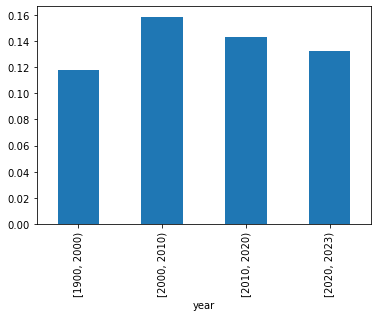

In [38]:
movies.groupby("year")["negative"].mean().plot.bar()

In [39]:
movies['publish_year'] = movies['publish_time'].apply(lambda x: x.year)
movies['total'] = 0

year_count_df = movies[["publish_year", "total"]].groupby("publish_year").count().sort_values("publish_year", ascending=False)

year_count_df

,total
publish_year,
2022,82
2021,807
2020,956
2019,1151
2018,1341
...,...
1923,1
1921,2
1915,1


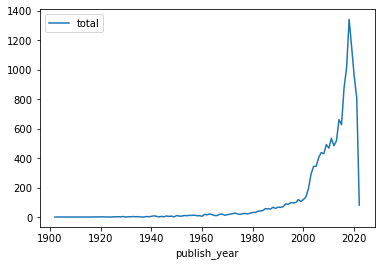

In [40]:
year_count_df.plot()

year_count_df.to_csv("year_count.csv")

In [48]:
# Get month count

movies['publish_month'] = movies['publish_time'].apply(lambda x: x.replace(day=1))
movies['total'] = 0

month_count_df = movies[["publish_month", "total"]].groupby("publish_month").count().sort_values("publish_month", ascending=False)

month_count_df['time'] = month_count_df.index

month_count_df


,total,time
publish_month,,
2022-03-01,10,2022-03-01
2022-02-01,24,2022-02-01
2022-01-01,48,2022-01-01
2021-12-01,75,2021-12-01
2021-11-01,73,2021-11-01
...,...,...
1921-03-01,1,1921-03-01
1921-02-01,1,1921-02-01
1915-02-01,1,1915-02-01


<AxesSubplot:xlabel='publish_month'>

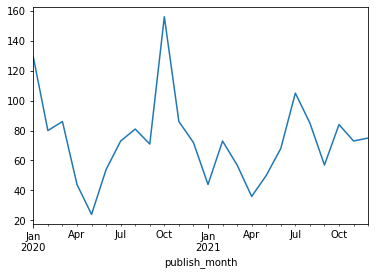

In [52]:
import datetime


start = datetime.datetime.now().replace(year=2019, month=12, day=1)
end = start.replace(year=2021, month=12, day=1)

result = month_count_df[month_count_df['time'] >= start][month_count_df['time'] <= end]

result.to_csv("month_count.csv")

result["total"].plot()



In [54]:
movies['publish_year'] = movies['publish_time'].apply(lambda x: x.year)
movies['profit'] = movies['revenue'] - movies['budget']

year_profit_df = movies[["publish_year", "profit"]].groupby("publish_year").sum().sort_values("publish_year", ascending=False)

year_profit_df.to_csv("year_profit.csv")

year_profit_df

,profit
publish_year,
2022,3.279745e+08
2021,2.724242e+10
2020,4.729097e+09
2019,7.623096e+10
2018,7.991038e+10
...,...
1923,1.379000e+06
1921,2.240811e+06
1915,1.090000e+07


In [56]:

movies['publish_month'] = movies['publish_time'].apply(lambda x: x.replace(day=1))
movies['profit'] = movies['revenue'] - movies['budget']

month_profit_df = movies[["publish_month", "profit"]].groupby("publish_month").sum().sort_values("publish_month", ascending=False)

month_profit_df['month'] = month_profit_df.index
start = datetime.datetime.now().replace(year=2019, month=12, day=1)
end = start.replace(year=2021, month=12, day=1)
month_2019_df = month_profit_df[month_profit_df['month'] >= start][month_profit_df['month'] <= end]
month_2019_df.to_csv("month_profit.csv")

year_profit_df

,profit
publish_year,
2022,3.279745e+08
2021,2.724242e+10
2020,4.729097e+09
2019,7.623096e+10
2018,7.991038e+10
...,...
1923,1.379000e+06
1921,2.240811e+06
1915,1.090000e+07
